# CA1 Data Visualization Higher Diplome Lvl8  

### Student - Linika Almeida, ID - 2023045

### Institution - CCT College

Description: This project is part of the HDIP Data Analytics course for the module of Data Visualization Techniques and implements a analyse based on a Board Game dataset.

### Importing Libraries

In [376]:
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [377]:
#Open dataset
df = pd.read_csv('board_games.csv')

### Data Description

You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   

### Exploratory Data Analyse

In the EDA I will do some assumptions, do a comprehension of the dataset and check missing values

In [378]:
#Show data head
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


Lets check some information in this dataset

In [379]:
#Show details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

From this output, we can see that the DataFrame has 10532 rows (entries) and 22 columns. The columns have different data types, including int64, float64, and object. 

Some features detected in data head are not relevant for the purpose of this analyse so they will be deleated, 
and they also contain NuN values. So for that reasons the follow feautures are going to be deleted: image, 
thumbnail, artist, compilation, expantion, publisher

In [380]:
# Drop columns that are not relevant for the analyse
df.drop(['image', 'thumbnail', 'artist', 'compilation', 'designer', 'expansion', 'family', 'publisher'], axis=1, inplace=True)

Checkinh the type of data we have in this dataset

In [381]:
#Describe the type of data
df.dtypes.value_counts()

int64      9
object     4
float64    1
dtype: int64

The dtype shows four features are object: ‘description’, ‘name’, ‘category’ and 'mechanic'. It is more appropriate convert them from an object to a category

In [382]:
# Convert object type for categorical features
df['description'] = df['description'].astype('category')
df['name'] = df['name'].astype('category')
df['category'] = df['category'].astype('category')
df['mechanic'] = df['mechanic'].astype('category')

#### Cleaning dataset

I am going to check the mising values in this dataset, once it can cause problem in the analyse, such a biased result, incorrect statistial inferences and error in machine learning models.

In [383]:
# Check missing values
df.isnull().sum()

game_id             0
description         0
max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

The features 'category' and 'mechanic' have missing values, both are categorical variables 

In [384]:
# Find rows with NaN values
rows_null_values = df[df.isnull().any(axis=1)]

# Display rows with NaN values
print(rows_null_values)

       game_id                                        description  \
23          25  In this fantasy sequel to Twilight Imperium, p...   
30          32  In Bison, a.k.a. Buffalo, one player represent...   
33          37  This odd little game put out by Games Workshop...   
34          38  Runes is a different kind of word game where p...   
35          39  Based on the books of Marion Zimmer Bradley th...   
...        ...                                                ...   
10496   206940  In Carcassonne: Amazonas, players sail their b...   
10509   208766  Description from the publisher:&#10;&#10;The c...   
10518   209886  Gambling continues in the glamorous world of L...   
10520   210342  Timeline: British History is a card game playe...   
10523   212382  In Yangtze, players are distributors on the Ya...   

       max_players  max_playtime  min_age  min_players  min_playtime  \
23               6           200       12            2           200   
30               2         

After analyse the rows with NaN values I decide to keep them and classify these line as special labels. Once the other features from the same line have important data for my analyse

In [385]:
# Specify the special label for NaN values
special_label = 'Special_Label'  # You can choose any label you prefer
special_label1 = 'Special_Label1'

# Add the special label as a new category
df['category'] = df['category'].cat.add_categories(special_label)
df['mechanic'] = df['mechanic'].cat.add_categories(special_label1)

# Replace NaN values with the special label
df['category'].fillna(special_label, inplace=True)
df['mechanic'].fillna(special_label1, inplace=True)

# Display the updated DataFrame
print(df)

       game_id                                        description  \
0            1  Die Macher is a game about seven sequential po...   
1            2  Dragonmaster is a trick-taking card game based...   
2            3  Part of the Knizia tile-laying trilogy, Samura...   
3            4  When you see the triangular box and the luxuri...   
4            5  In Acquire, each player strategically invests ...   
...        ...                                                ...   
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

       max_players  max_playtime  min_age  min_players  min_playtime  \
0                5           240       14            3           240   
1                4         

In [386]:
# Check missing values
df.isnull().sum()

game_id           0
description       0
max_players       0
max_playtime      0
min_age           0
min_players       0
min_playtime      0
name              0
playing_time      0
year_published    0
category          0
mechanic          0
average_rating    0
users_rated       0
dtype: int64

# Part 1	

#### a) What are the top 5 “average rated” games?  

The dataset will be sorted in a descending order to visualize the Top 5 average games

In [387]:
#Sort the DataFrame by 'average_rating' in descending order
top_rated_games = df.sort_values(by='average_rating', ascending=False)

The data is displayed in descending order accordlying with average rating

In [388]:
# Display the Top 5 games 
top_5_games = top_rated_games.head(5)
print(top_5_games[['name', 'average_rating']])

                                                 name  average_rating
8348                     Small World Designer Edition         9.00392
6392                           Kingdom Death: Monster         8.93184
9964                           Terra Mystica: Big Box         8.84862
8526                          Last Chance for Victory         8.84603
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


For visualization a bar plot graphyc was chosen to show the top 5 average rated games once it can represent in a simply and clear way what is requested

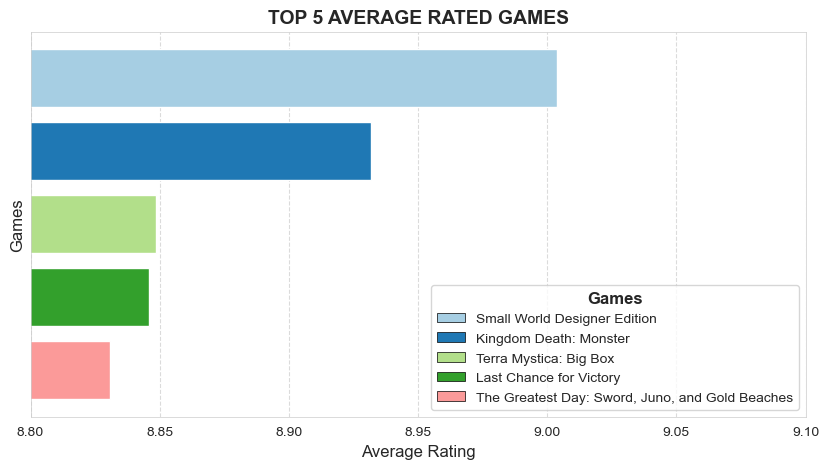

In [389]:
# Making a Bar Plot

#Sample data 
name = ['Small World Designer Edition', 'Kingdom Death: Monster', 'Terra Mystica: Big Box', 
        'Last Chance for Victory', 'The Greatest Day: Sword, Juno, and Gold Beaches']
average_rating = [9.00392, 8.93184, 8.84862, 8.84603, 8.83081]

# Define a color palette 
color_palette = sns.color_palette('Paired')

# Create a bar plot using the color palette
plt.figure(figsize=(10, 5))
bars = plt.barh(name, average_rating, color=color_palette)

# Adjust font size and style
plt.xlabel('Average Rating', fontsize=12, fontweight='normal')  
plt.ylabel('Games', fontsize=12, fontweight='normal')  
plt.title('TOP 5 AVERAGE RATED GAMES', fontsize=14, fontweight='bold')  

#Adjust figure area, add grid and sort highest rating at the top
plt.xlim(8.8, 9.1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  

# Remove y-axis labels
plt.yticks([])

# Create a legend 
legend_handles = [plt.Rectangle((0,0),1,1, color=color_palette[i], ec="k", lw=0.5, label=name) for i, name in enumerate(name)]
legend = plt.legend(handles=legend_handles, loc='lower right', title='Games', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Games', prop={'size': 12, 'weight': 'bold'})

# Customize the figure border and decrease the linewidth
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)      

plt.show()

#### • Method to engineer the data:

The top-rated games' names were organized into two lists, "name" and "average_rating," and their associated average ratings were then utilized to generate the data for this bar graphic.
I used the Seaborn library's sns.color_palette('Paired') to give each bar in the plot a different color when defining the color palette.
The function plt.barh(), which accepts the game titles as the y-axis labels and their accompanying average ratings as the x-axis values, was used by me to construct the horizontal bar plot. 

This method organizes and presents data in a horizontal bar plot, emphasizing the average ratings of the top-rated games and providing an appealing visualization with various stylistic enhancements.

I also customize the figure, created the legend and finilly display the plot

For customization was made an ajusting the figure area and setting specific limits on the x-axis (plt.xlim(8.8, 9.1)). Add Grid lines to aid in reading the values. The y-axis labels are removed to create a cleaner appearance.

In the legend consists of colored rectangles using plt.Rectangle with labels that represent the game names.

#### • Visualizations: 
For visualization I used the bar plot graphyc to display counts the relationship between the numerical variables. It show in a simple way the comparation of the variables with the highest average. 

Bar plot is very usufull. It also allow to compare distinct categories, this visualization method is effective to see how ratings differ among the games.

The horizontal vizualization of the Top Rated Games is effective to compare the values of different categories and also because the laybal description was long so it is easy to visualize in this shape.

#### • Design decisions (colour, font, titles, size, text position, font size etc) : 

Colour: I choose for vizualization the Paired palette from seaborn, once the colors are distint and represent each different variable. This type of combination of colours is more suitable for viewers with color vision deficiencies too. The colors are visually balanced and harmonious and viewers can easily identify and associate colors with specific category.

Font size and bold: it shows visual hierarchy about the information presented and emphasis. For title I choose size 14 and bold for emphasize the theme of the graphic. In the legend the font size is 12 to ensure it dont dominate the graphic and at the same point give emphasis to the game's informations. 

The choice of font size and font boldness in a graphic plays a crucial role in enhancing the clarity, visual hierarchy, and overall readability of the information presented. For the data values Font Size is 10, it make the text legible without overwhelming the data points, it provides viewers with precise information while maintaining a clean and uncluttered look. 

By applying different font sizes and weights strategically, the viewers through the graph's content, emphasizing what's most important and ensuring a balanced and aesthetically pleasing representation of your data.

Font type: using Arial as the font in your graph is for prioritizes readability and neutrality, helping the graph is effectively communicates the data without introducing distractions or readability issues.

#### b) Is there a correlation between the “users_rated” and the “max_playtime”?  

For verify is there is any correlation between this two variables I am going to check the result of correlation and plot a graphyc that express the result

In [390]:
# Check correlation between users_rated and max_play_time
correlation = df['users_rated'].corr(df['max_playtime'])
print(correlation)

-0.004341647333776701


The result od the correlation -0.0043 implies that there is a slight tendency for one variable to decrease as the other increases, or vice versa. 

This tendency is very weak, it means these variables are essentially independent of each, don't have capacity to predicte each other. 

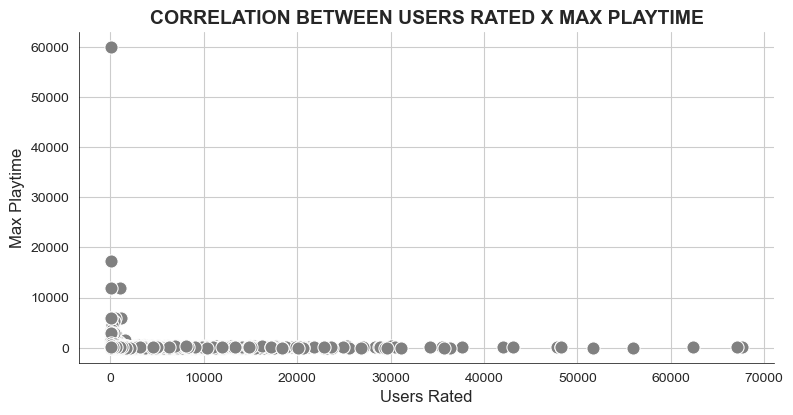

In [391]:
# Checking correlation between the variables in a Scatterplot

# Add grid, Adjust the marker size
sns.set_style("whitegrid")
sns.relplot(x='users_rated', y='max_playtime', data=df, s=90, color= 'gray', height=4, aspect=2)  

# Adjust font size and style
plt.xlabel('Users Rated', fontsize=12, fontweight='normal', fontname='Arial')  
plt.ylabel('Max Playtime', fontsize=12, fontweight='normal', fontname='Arial')  
plt.title('CORRELATION BETWEEN USERS RATED X MAX PLAYTIME', fontsize=14, fontweight='bold', fontname='Arial')  

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')  

plt.show()

#### • Method to engineer the data:

For analyse the correlation between Users Rated and Max Playtime I used the tool sns.relplot by the Seaborn library. This method allowing to visualize the relationship and correlation between two variables. The choice of the plot type in sns.relplot was scatter plot, once it determine if there is a linear relationship between variables. This arrangement allows for the visualization of individual data points for each board game.

#### • Visualizations: 

In terms of visualization, I apply a scatter plot to represent the result of the correlation. This is a very clear manner to show the data, once the position of data points on the plot conveys information about the relationship between the variables.

Provide insights about patters and show the direction of relatioship between the variables if it is positive or negative.

This graphyc is also customizable, it allows to change colors, labels and emphasize data.

Scatterplots can be used to infer conclusions about the relationship between variables because they are interpretable. In this instance, conclusions about the relationship between user ratings and maximum playtime can be drawn from the plot.

#### • Design decisions (colour, font, titles, size, text position, font size etc) : 

Color: I chose the color gray to represent the non correlation between the variables, this decision considereted the principles of colors and visual representation, such color gray, white or neutral indicate no correlation. These colors suggest the absence of a relationship between variables. This color no introduce bias into the interpretation of the data and allows the eyes to focus on significant relationships and real trends.

For Font, titles, size and text position I applyed the same principles from the first graphy. In additional in this graphyc I applyed height and aspect tools to lengthen the size of the figure for the plots get a proportinal size.

Font size and bold: it shows visual hierarchy about the information presented and emphasis. For title I choose size 14 and bold for emphasize the theme of the graphy. In the legend the font size is 12 to ensure it dont dominate the graphy and at the same point give emphasis to the game's informations.

The choice of font size and font boldness in a graph plays a crucial role in enhancing the clarity, visual hierarchy, and overall readability of the information presented. For the data values Font Size is 10, it make the text legible without overwhelming the data points, it provides viewers with precise information while maintaining a clean and uncluttered look.

By applying different font sizes and weights strategically, the viewers through the graph's content, emphasizing what's most important and ensuring a balanced and aesthetically pleasing representation of your data.

Font type: using Arial as the font in your graph is for prioritizes readability and neutrality, helping the graph is effectively communicates the data without introducing distractions or readability issues.

#### c) What is the distribution of game categories?

In [392]:
#Show the category in this dataset
df.category

0                     Economic,Negotiation,Political
1                                  Card Game,Fantasy
2                         Abstract Strategy,Medieval
3                                            Ancient
4                                           Economic
                            ...                     
10527                            Vietnam War,Wargame
10528    Card Game,Fantasy,Fighting,Video Game Theme
10529                                      Card Game
10530              Miniatures,Racing,Science Fiction
10531                        Card Game,City Building
Name: category, Length: 10532, dtype: category
Categories (3861, object): ['Abstract Strategy', 'Abstract Strategy,Action / Dexterity', 'Abstract Strategy,Action / Dexterity,Book,Car..., 'Abstract Strategy,Action / Dexterity,Children..., ..., 'World War I', 'World War II', 'Zombies', 'Special_Label']

In [393]:
# Assuming 'category' is the column containing game categories
unique_categories_count = df['category'].nunique()

print(f'Total number of unique categories: {unique_categories_count}')


Total number of unique categories: 3861


In [394]:
# Get unique names within the 'category' column
unique_names = df['category'].unique()

# Print all the unique names in the 'category' column
for name in unique_names:
print(name)

IndentationError: expected an indented block (2022732880.py, line 6)

In [395]:
# Group the DataFrame by the 'category' column and count the occurrences
name_counts = df['category'].value_counts().reset_index()

# Rename the columns for clarity
name_counts.columns = ['category', 'Count']

# Display the table
print(name_counts)

                                               category  Count
0                                  Wargame,World War II    449
1                                             Card Game    438
2                                     Abstract Strategy    284
3                                    Napoleonic,Wargame    124
4                                              Economic    116
...                                                 ...    ...
3856                Bluffing,Card Game,Economic,Fantasy      1
3857    Bluffing,Card Game,Economic,Fantasy,Negotiation      1
3858  Bluffing,Card Game,Economic,Fighting,Science F...      1
3859      Bluffing,Card Game,Economic,Mafia,Negotiation      1
3860                       Card Game,Dice,Fantasy,Humor      1

[3861 rows x 2 columns]


In [396]:
# Group the DataFrame by the 'category' column and count the occurrences
name_counts = df['category'].value_counts().reset_index()

# Rename the columns for clarity
name_counts.columns = ['category', 'Count']

# Sort the table by 'Count' in descending order
name_counts = name_counts.sort_values(by='Count', ascending=False)

# Display the top 10 names and their counts
top_10_names = name_counts.head(20)
print(top_10_names)

                          category  Count
0             Wargame,World War II    449
1                        Card Game    438
2                Abstract Strategy    284
3               Napoleonic,Wargame    124
4                         Economic    116
5                Card Game,Fantasy    110
6                             Dice    107
7       American Civil War,Wargame     97
8                    Special_Label     94
9           Modern Warfare,Wargame     89
10                      Party Game     77
11                 Ancient,Wargame     75
12         Science Fiction,Wargame     66
13              Action / Dexterity     55
15             Wargame,World War I     54
14                         Fantasy     54
16                        Medieval     51
17               Party Game,Trivia     47
18               Animals,Card Game     46
19  Economic,Trains,Transportation     43


In this step the Treeplot will be created to show the games categories

In [397]:
#Create a Treeplot to represent the game categories

# Choose an accessible color palette
colors = px.colors.qualitative.Set3

# Create a Treemap with Plotly Express
fig = px.treemap(top_10_names, path=['category'], values='Count', color_discrete_sequence=colors)

# Customize the title 
fig.update_layout(title_text='TOP 10 GAME CATEGORIES (TREEMAP)', title_font=dict(family='Arial', size=14), title_x=0.5  
                  
# Customize the text
fig.update_layout(font=dict(family='Arial', size=14))

# Show the Treemap
fig.show()

SyntaxError: invalid syntax (913656585.py, line 13)

#### • Method to engineer the data:
Hierarchical data are efficiently communicated with this treemap, where categories are arranged into tiers based on the top 10. The method for engineering this data involved importing the Plotly Express library with the alias 'px'. A great option for treemaps is Plotly Express, a flexible Python package for building interactive visualizations.

The 'px.colors.qualitative' group of colors was used to create the color scheme. Using the function 'px.treemap' to construct the visualization, the next step was to create the Treemap. 

The following are the important criteria:
- Top_10_names: This represents the data source and should be changed with your actual DataFrame containing the top 10 categories and their numbers.

- Path=['category']: The path argument specifies the column(s) that correspond to the levels in the treemap, which establishes the hierarchy. Category here refers to the category column.

- The option values=Count specifies the values for each category, which correspond to the number of games in that category.

- Color_discrete_sequence=colors: The selected color scheme is used to represent various categories.

#### • Visualizations: 
The top 10 game genres are represented by a treemap visualization, which was chosen for being ideal for displaying hierarchical data, where game categories are organized hierarchical and the spectators can see how each category contributes to the overall experience. 

It is also use the scape effectivelly with each category depicted as a rectangular block, treemaps make efficient use of space by separating the visualization into rectangles. When dealing with a big number of categories, this arrangement is helpful.

It allow to compare categories once it is simple to assess how large certain categories are. 

Treemap has a color coding that can be used to encode additional information, such metrics or category numbers. Viewers can more easily recognize patterns and variances by using a color scheme that separates across categories.

This graphy is great to foccus the Top 10 game categories, there is option for exhibiting the top 10 game categories because they excel at presenting a small number of categories. 

In conclusion, the treemap was chosen because it effectively represents hierarchical data, allows for category comparisons, and offers interactivity and aesthetic appeal. It is a good option for showing the distribution of the top 10 game categories because of these features.

#### • Design decisions (colour, font, titles, size, text position, font size etc) : 

The design decisions for the treemap visualization created a clear, aesthetically pleasing, and informative representation of the top 10 game categories.

Color: From the available color schemes offered by Plotly Express, "Set3," a high-quality color palette, was chosen. Each category's colors are distinct and simple to distinguish in this palette. The choice of a color scheme was crucial for properly separating categories.

Font Family: Arial was selected as the type of font because it is readable and guarantees that the content is understandable and simple to read.

Formatting: The title was given a larger font size of 14. It makes the purpose of the graphic abundantly clear.

Title Alignment: The treemap's title was positioned in the center. The depiction is more visually balanced and appealing as a result of the title's centering.

The remaining text is in the Arial font, size 12. The visualization is uniform and readable thanks to the constant text size.

Positioning of Text: The category labels and count values were automatically positioned within the treemap's rectangles, ensuring they are contained and legible. The automatic placement optimizes space and minimizes overlap.

This graphic design choices were made with the intention of producing a treemap that is both aesthetically pleasing and educational and that accurately depicts the distribution of the top 10 gaming categories. A balanced and captivating representation is made possible by the color scheme, font family, title style, and intelligent text positioning.

#### d) Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  


The data will be separeted in two parts, one considering older games and other newer games. 
This way will be possible to calculate the median for each category older and newer games considering the average rating

In [398]:
# Separate the data into older and newer games
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]

In [399]:
#Calculate the median average rating for both groups over time
median_ratings_older = older_games.groupby('year_published')['average_rating'].median()
median_ratings_newer = newer_games.groupby('year_published')['average_rating'].median()

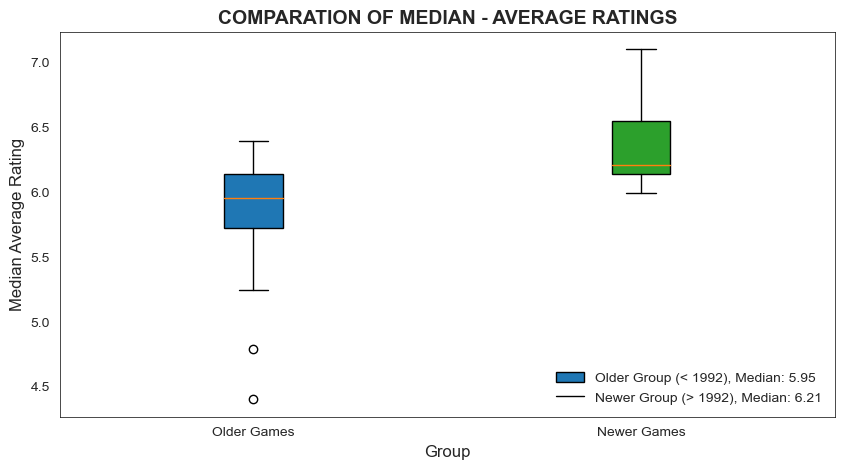

In [400]:
# Create a box plot to compare the median ratings
plt.figure(figsize=(10, 5))

# Define colors for the boxes
colors = ['#1f77b4', '#2ca02c']

# Create the box plot with custom colors
boxplot = plt.boxplot([median_ratings_older, median_ratings_newer], labels=['Older Games', 'Newer Games'], patch_artist=True)

# Apply custom colors to the boxes
for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

plt.title('COMPARATION OF MEDIAN - AVERAGE RATINGS', fontsize=14, fontweight='bold', fontname='Arial')
plt.xlabel('Group', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Median Average Rating', fontsize=12, fontweight='normal', fontname='Arial')

# Calculate the medians
median_older = round(median_ratings_older.median(), 2)
median_newer = round(median_ratings_newer.median(), 2)

# Add a legend with median values
plt.legend([f'Older Group (< 1992), Median: {median_older}', f'Newer Group (> 1992), Median: {median_newer}'],
           loc='lower right', frameon=False)

# Remove the grid lines
plt.grid(False)

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

In [401]:
# Perform a Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(older_games['average_rating'], newer_games['average_rating'], alternative='greater')

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f"The p-value is {p_value:.4f}. There is a statistically significant difference.")
    print("Older games have a significantly higher median average rating than newer games.")
else:
    print(f"The p-value is {p_value:.4f}. There is no statistically significant difference.")
    print("There is no strong evidence that older games have a higher median average rating than newer games.")

The p-value is 1.0000. There is no statistically significant difference.
There is no strong evidence that older games have a higher median average rating than newer games.


#### • Method to engineer the data:

In order to engineer the data for this particular analysis the method of  segmentation was applyed dividing the data into the two relevant groups being them: older and newer games. 
The next step consiste in data aggregation that agroup the data by determining the median 'average rating' for each group. After that the method of data visualization was applyed using the box plot to compare the medians in order to visually understand the results. This method aids in determining whether older games have a higher median "average rating" than more recent ones.

#### • Visualizations: 

The choice of the boxplot in this visualization was due this graphy is easy to compare the central tendency between two groups, once it is possible to see in a clear way the central tendence of each group (older and newer games). Box plots reveal details on the distribution and spread of the data within each category. It is possible to collect other informations beside median as the value of quartiles including the first quartile (Q1), third quartile (Q3), and interquartile range (IQR), which will help you comprehend the variation in "average rating" within each group.

The results of this box plot show the older games does not have higher average than newer games
- Older game - 5.95
- Newer game - 6.21

These median vallues can be observed in the Middle Line in the box, which represent the middle point when the data is sorted. It's the 50th percentile of the data. For each box, it tells you the median "average rating" for games in that group.

You can observe in this graphy the Middle Line (Median) for older games (left box) is lower than for newer games (right box) 

#### • Design decisions (colour, font, titles, size, text position, font size etc) : 

Color: these colors were chosen for the box for being vibrants and distinctive, specifically red (#FF6B6B) and green (#6BFF6B). It make a contrast between the two groups (Older Games and Newer Games), making it easy for viewers to differentiate between them. These colors also create a harmonious and visually pleasing color palette. The type patch_artist for the boxes makes the graph more engaging and visually distinctive giving enphases in the data.

Font: The title, x-axis label, and y-axis label all use the Arial font, which is a clean and easily readable typeface. Consistency in font choice improves readability and aesthetics. For the title is given a larger font size (14) and bold font weight to make it stand out and convey its importance. In the axis labels are slightly smaller (12) with a normal font weight for readability.

Title Clarity: The title "COMPARATION OF MEDIAN - AVERAGE RATINGS" is informative and clear, providing the viewer with a concise description of the content of the graph.

Legend: I added a legend in the lower right of the graph to explain what each group represents and including the median values for both groups. This additional information enhances the viewer's understanding.

Border: A border was added around the figure to give the graph a neat and defined appearance.

Grid Lines: To make the graph clearer and simpler to understand, the grid lines have been eliminated.

Figure Size: Without being excessively large or too small, the selected figure size (10 inches wide by 5 inches tall) is suitable for presenting the data and labels.

Text Positioning: To prevent overlapping and to improve readability, the title, labels, and legend are placed carefully.

#### e) What are the 5 most common “mechanics” in the dataset?  

In [402]:
# Count the frequency of each unique mechanic
mechanics_counts = df['mechanic'].value_counts()

# Get the 5 most common mechanics
top_5_mechanics = mechanics_counts.head(5)

# Print the results
print("The 5 most common mechanics are:")
print(top_5_mechanics)

The 5 most common mechanics are:
Special_Label1          950
Hex-and-Counter         523
Hand Management         297
Dice Rolling            222
Roll / Spin and Move    199
Name: mechanic, dtype: int64


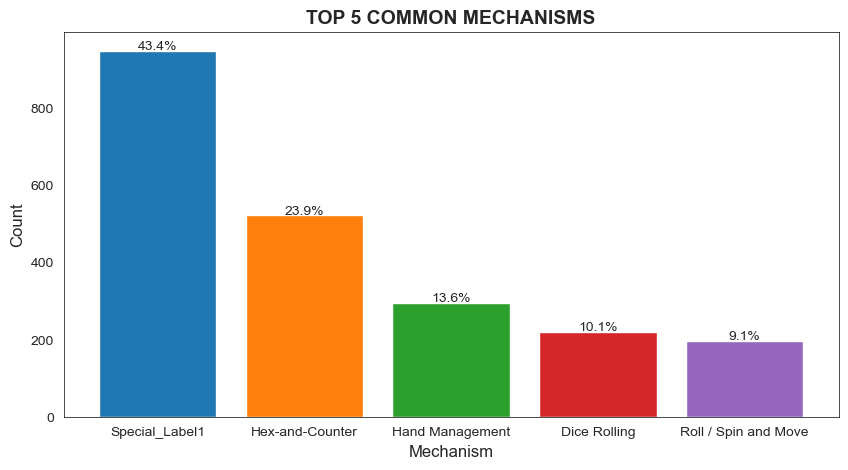

In [403]:
# Create a Pareto chart
plt.figure(figsize=(10, 5))

# Define a list of distinct colors (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the Pareto chart with custom colors
for i, (mechanism, count) in enumerate(zip(top_5_mechanics.index, top_5_mechanics.values)):
    plt.bar(mechanism, count, color=colors[i])
    
    # Add percentage on top of each bar
    percentage = (count / top_5_mechanics.sum()) * 100
    plt.text(mechanism, count + 1, f'{percentage:.1f}%', ha='center', fontsize=10, fontweight='normal')

plt.xlabel('Mechanism', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('TOP 5 COMMON MECHANISMS', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

#### • Method to engineer the data:

In order to determine which mechanics are most prevalent, I used the methods of counting the frequency of each distinct mechanic in your dataset, selecting the top 5 mechanics based on their frequency, and plotting the findings in a Pareto chart.

This data preparation is essential for producing a Pareto chart once it enables to recognize and highlight the major sources of variation in your dataset. The Pareto chart is a useful tool for comprehending data distribution and concentrating on the most important components.

#### • Visualizations:

A Pareto chart was used to visualize the data in this graph. The values are shown in this graph in decreasing order. 

Given that it emphasizes the major contributors and prioritises the most important aspects or categories, the Pareto is a good choice for this situation since it makes it simple to prioritize and concentrate on the major contributors. 

Additionally, it enables the categories to be ordered, with the most popular mechanisms at the top. 

This is crucial for swiftly determining the aspects in your data that are most frequently present. The data distribution across categories is also well visualized in this graph. 

This makes it simpler to observe which categories are more dominant than others. Additionally, Pareto charts are quite successful at explaining the results to others.

The Pareto chart can show how the distribution of game mechanics is distributed. In a may rapidly comprehend which game mechanisms are the most widespread and their overall impact by looking at the top 5 most frequent mechanisms, together with their frequencies and cumulative percentages.

#### • Design decisions (colour, font, titles, size, text position, font size etc) :

Color: Each bar in the chart is represented by a different color. To make the chart accessible to a large audience, these colors were selected to be colorblind-friendly.

All of the fonts are in Arial, which is a simple and readable typeface that guarantees the text's legibility.

Font Size and Weight: To emphasize the title's significance and make it stand out, I utilized a higher font size (14) and bold font weight. It is simple to read because the axis labels have a font size of 12. 

Clarity of Title: The succinct summary of the chart's contents under the title "TOP 5 COMMON MECHANISMS" is clear and instructive.

Bar Colors: Each category has a different color, which makes it simple to interpret. The colors are bold and aesthetically beautiful.

Text Positioning: By carefully placing percentage figures on top of each bar, viewers may quickly comprehend how each mechanism contributes to the overall count.

The size of the chart, which is 10 inches wide by 5 inches height, is suitable for displaying the data and labels without being excessively enormous or small.

Border: By adding a border around the figure, the chart appears tidy and well-defined.

### Part 2

You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1.
This must have a logical basis that enhances the information and insight gained in the scenario. 

#### What are the top 5 Name of games considering the max playtime

In [404]:
# Get the top 5 games with the highest 'max_playtime'
top_5_max_playtime = df.nlargest(5, 'max_playtime')

In [405]:
# Names of the games
games = top_5_max_playtime['name'].tolist()  # Convert to a list
print(games)

['The Campaign for North Africa', '1914: Offensive à outrance', 'Empires in Arms', 'Drang Nach Osten!', 'World in Flames']


In [406]:
# Corresponding max_playtime values
max_playtimes = top_5_max_playtime['max_playtime']

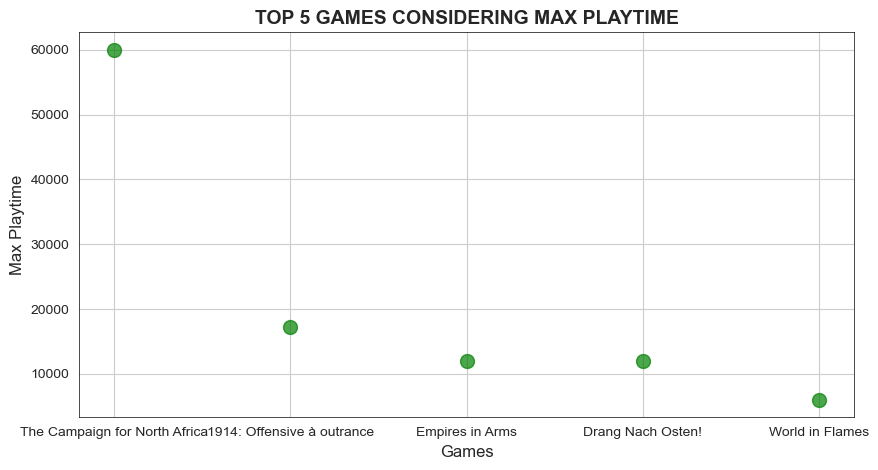

In [411]:
# Create a Dot plot with max_playtime on the y-axis

# Font family to 'Arial' 
plt.rcParams['font.family'] = 'Arial'

#Define figure
plt.figure(figsize=(10, 5))
plt.scatter(games, max_playtimes, c='green', s=100, alpha=0.7)
plt.title('TOP 5 GAMES CONSIDERING MAX PLAYTIME', fontsize=14, fontweight='bold')
plt.xlabel('Games', fontsize=12)
plt.ylabel('Max Playtime', fontsize=12)
plt.grid(True)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

#### • What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario 

Considering the company want to determine the sales strategy for their upcoming Winter season the question (What are the top 5 Games considering the max playtime) show what game is most enjoyable and capch the attention of players for more time.

Based on that the company can analyse what there is in this games that make players playing more, what type of design they have and what category they represent. 

With these information the company can improve the other games in a way that make them more enjoyable, they can invest in marketing in the top 5 games to attract more players, and with this profite can also invest more in this type os games.

#### • Method to engineer the data:

The method used to prepare and engineer the data consisted in select the top 5 name of games considering the max playtime values, this selection is achieved using the `nlargest` method from the Pandas library.

The next step was create two list containing the names of the games and another for the corresponding max_playtime.

For the data visualization was applyed a dot plot. This plot allows you to compare the "max_playtime" values for each of the top 5 games.

For the plot display I used the plt.show() funcction.

#### • Visualizations

For this visualization, I went with a dot plot because of its clarity and simplicity; each point is represented by a single dot.

It displays the specific points for each distribution category.

Due to the fact that each of the top 5 games is represented by a unique dot, it is also simple to compare their maximum playtimes.

They have a simple layout that can assist in drawing the viewer's attention to the data itself. 

#### • Design decisions (colour, font, titles, size, text position, font size etc) :

Color: green contrasts well with a white, it is also associated with positive attributes such as growth, prosperity, and harmony.

Font: I used the font family to Arial for being a legible font, clear and easy to understand.

Titles: The title of plot, "TOP 5 GAMES CONSIDERING MAX PLAYTIME," provides a understand the purpose of the visualization. The size 14 and bold give emphasis to the principal message.

Size: For the dots I used size `s=100`, it give emphasis and let the data points more prominent.

Text Position and Font Size: rotated the x-axis labels to prevent overlap. 

Grid: included grid lines in this plot, help viewers gauge values more accurately. 

### References



“Choosing Color Palettes — Seaborn 0.9.0 Documentation.” Pydata.org, 2013, seaborn.pydata.org/tutorial/color_palettes.html.

Mckinney, Wes. Python for Data Analysis : Data Wrangling with Pandas, NumPy, and IPython, 2017.

VanderPlas, Jake. “Python Data Science Handbook | Python Data Science Handbook.” Github.io, 2019, jakevdp.github.io/PythonDataScienceHandbook/.